<a href="https://colab.research.google.com/github/afraa-n/Explainable-Techniques-II/blob/main/Explainable_Techniques_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #6 - Explainable Techniques II: PDP, ICE, and ALE Plots

## Introduction

This notebook demonstrates the application of explainable AI techniques to analyze the Breast Cancer Wisconsin dataset. We'll use Partial Dependence Plots (PDP), Individual Conditional Expectation (ICE) plots, and Accumulated Local Effects (ALE) plots to understand how different features affect the prediction of breast cancer diagnosis.

## Dataset Description

Target variable:
- target:

## Methodology

1. Data Loading and Preprocessing
2. Exploratory Data Analysis
3. Model Training (Random Forest Classifier)
4. Implementation of Explainable AI Techniques:
   - Partial Dependence Plots (PDP)
   - Individual Conditional Expectation (ICE) Plots
   - Accumulated Local Effects (ALE) Plots
5. Analysis and Interpretation of Results

In [1]:
#!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [2]:
#!pip install pdpbox

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from pdpbox import pdp, info_plots
from alepython import ale_plot

# Load the Titanic dataset from seaborn library
data = sns.load_dataset('titanic')

# Select a subset of columns for simplicity and drop rows with missing values
data = data[['pclass', 'age', 'sex', 'fare', 'survived']].dropna()

# Convert categorical features to numeric
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

Dataset Shape: (714, 5)
First Few Rows of the Dataset:
   pclass   age  sex     fare  survived
0       3  22.0    0   7.2500         0
1       1  38.0    1  71.2833         1
2       3  26.0    1   7.9250         1
3       1  35.0    1  53.1000         1
4       3  35.0    0   8.0500         0

Missing Values per Column:
pclass      0
age         0
sex         0
fare        0
survived    0
dtype: int64

Data Types:
pclass        int64
age         float64
sex           int64
fare        float64
survived      int64
dtype: object

Statistical Summary of Numerical Features:
           pclass         age         sex        fare    survived
count  714.000000  714.000000  714.000000  714.000000  714.000000
mean     2.236695   29.699118    0.365546   34.694514    0.406162
std      0.838250   14.526497    0.481921   52.918930    0.491460
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      1.000000   20.125000    0.000000    8.050000    0.000000
50%      2.000000   28.0000

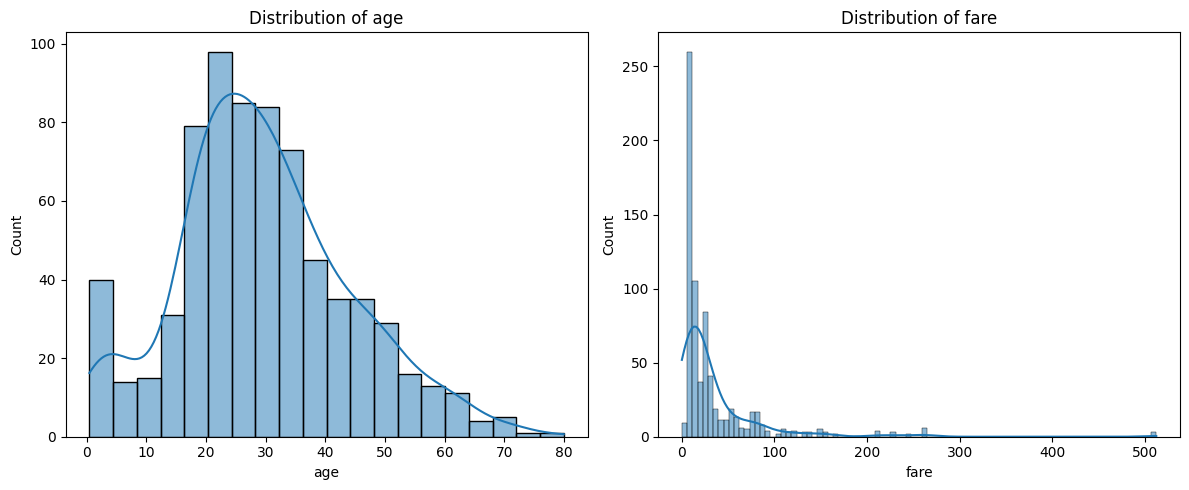

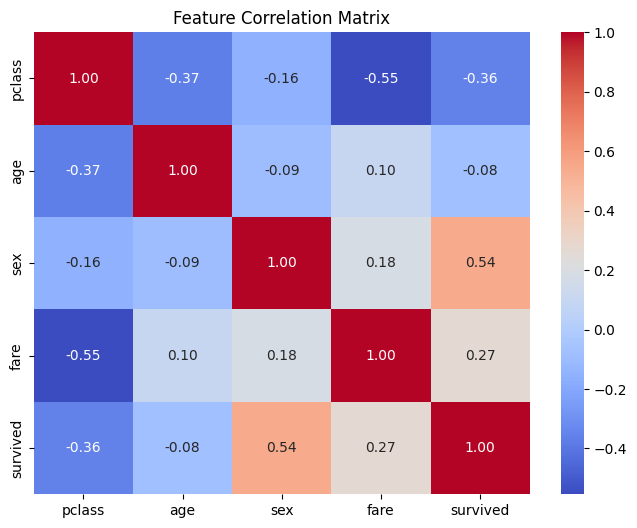

In [4]:
# EDA

# Dataset Overview
print("Dataset Shape:", data.shape)
print("First Few Rows of the Dataset:")
print(data.head())

# Check for Missing Values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# Data Type Inspection
print("\nData Types:")
print(data.dtypes)

# Statistical Summary
print("\nStatistical Summary of Numerical Features:")
print(data.describe())

# Distribution of Numerical Features
numerical_features = ['age', 'fare']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [5]:
# Train-Test Split
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
print("\nModel Score (Training):", model.score(X_train, y_train))
print("Model Score (Testing):", model.score(X_test, y_test))


Model Score (Training): 0.9912434325744308
Model Score (Testing): 0.7482517482517482


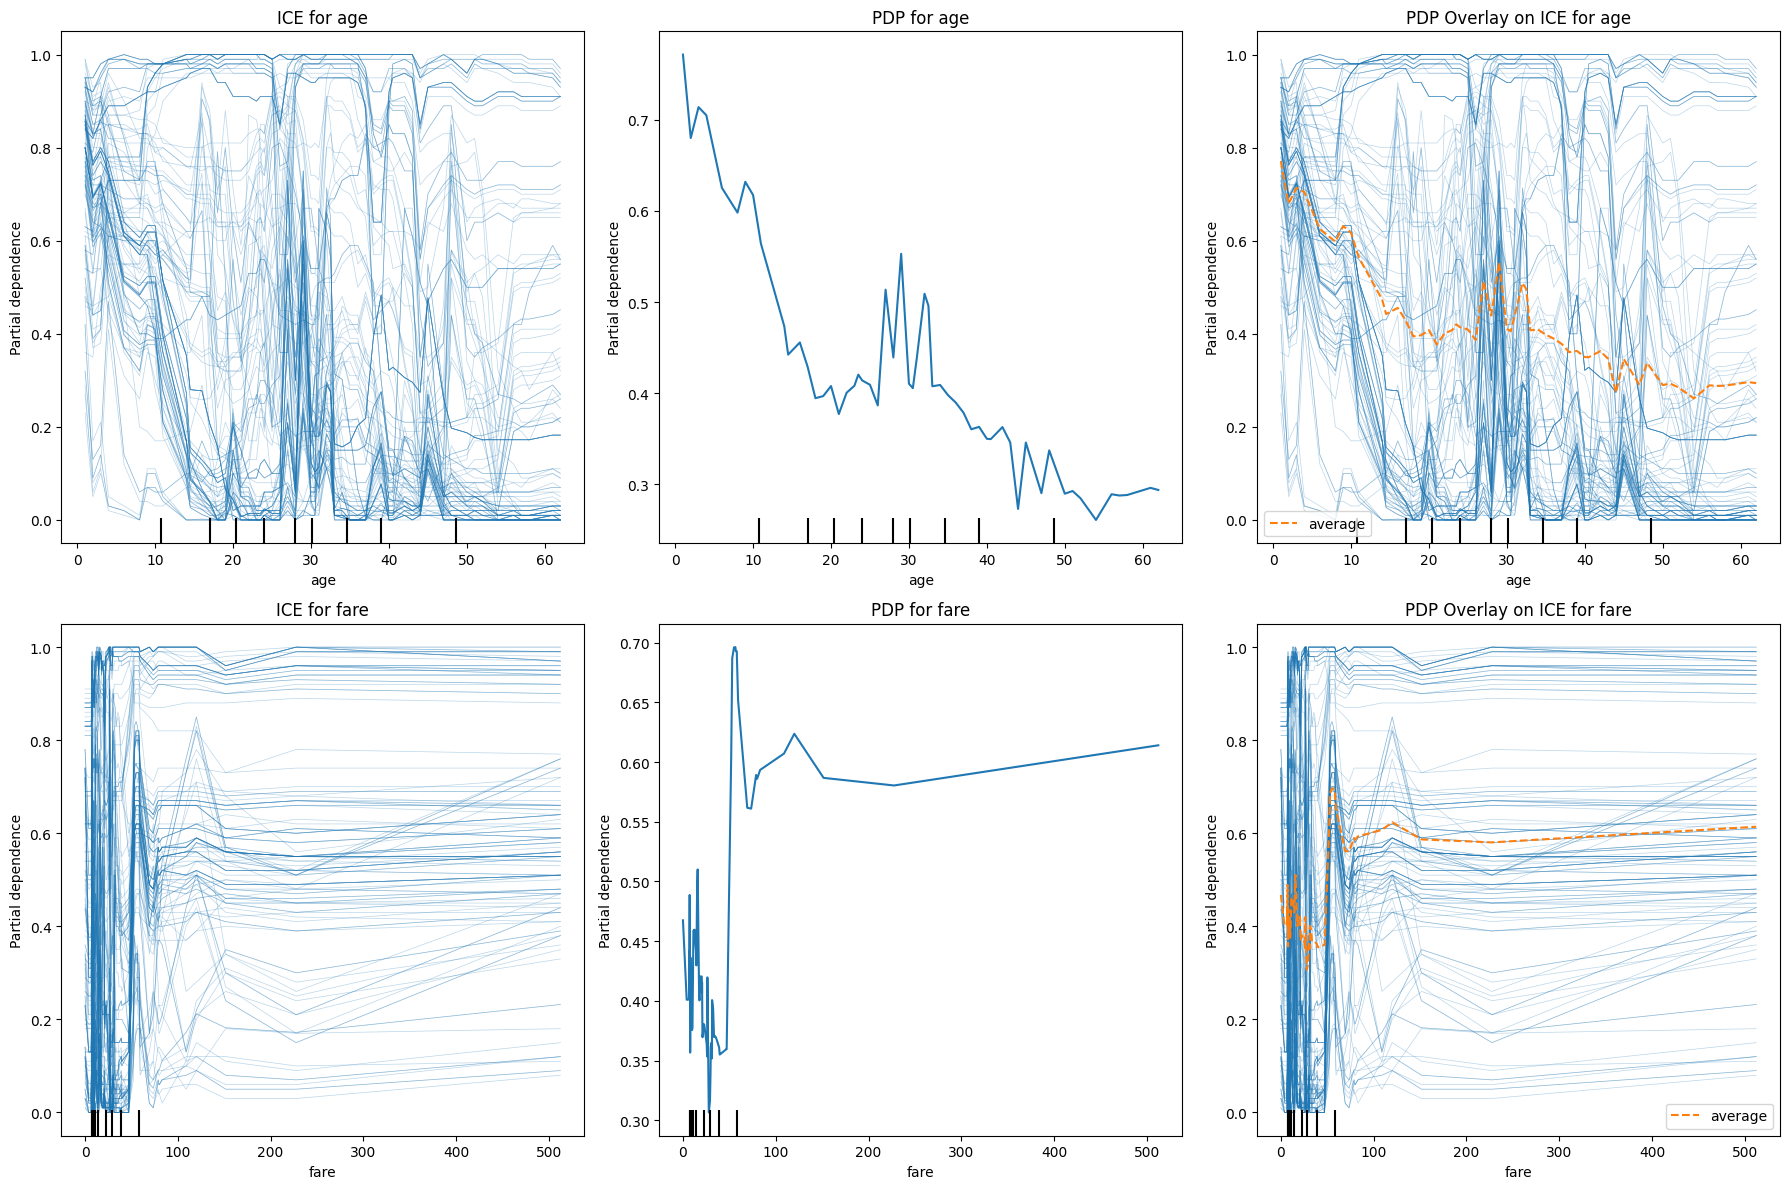

In [15]:
# Features to plot
features = ['age', 'fare']

# Create subplots for ICE, PDP, and Overlay
fig, axes = plt.subplots(len(features), 3, figsize=(18, 12))

for i, feature in enumerate(features):
    # ICE Plot
    ice_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='individual', ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'ICE for {feature}')

    # PDP Plot
    pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='average', ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'PDP for {feature}')

    # Overlay PDP on ICE Plot
    # First, plot the ICE plot and capture axes_
    ice_pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='both', ax=axes[i, 2]  # 'both' combines PDP and ICE
    )
    axes[i, 2].set_title(f'PDP Overlay on ICE for {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

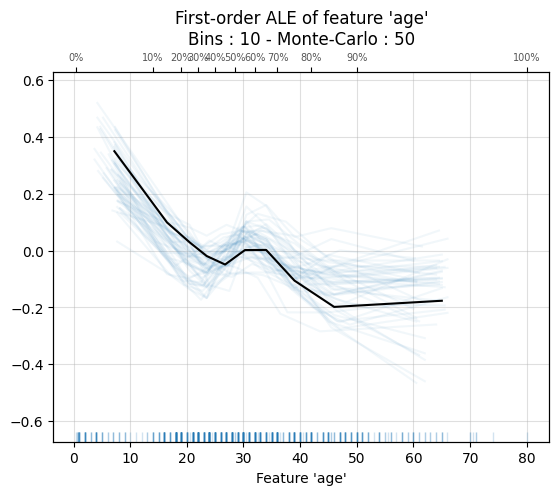

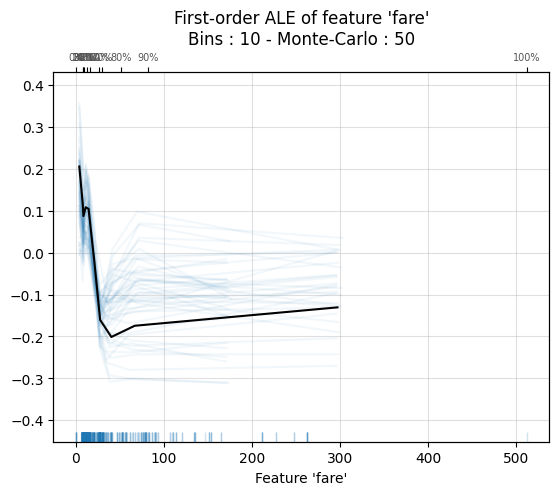

<Axes: title={'center': "First-order ALE of feature 'fare'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'fare'">

In [19]:
# First-order ALE Plot with default parameters for 'age' and 'fare'
ale_plot(
    model,
    X_train,
    "age",
    bins=10,
    monte_carlo=True,
    monte_carlo_rep=50,
    monte_carlo_ratio=1.0,
)

ale_plot(
    model,
    X_train,
    "fare",
    bins=10,
    monte_carlo=True,
    monte_carlo_rep=50,
    monte_carlo_ratio=1.0,
)

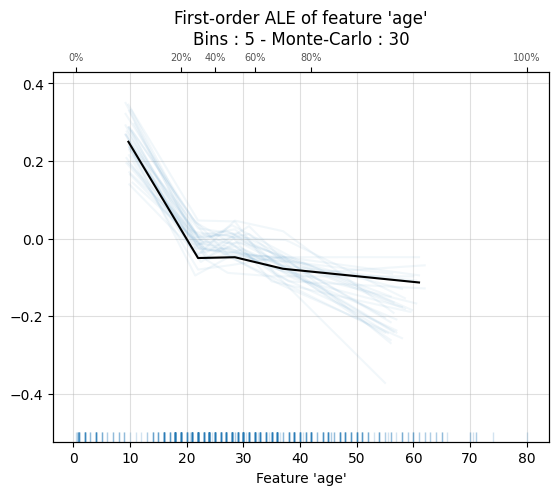

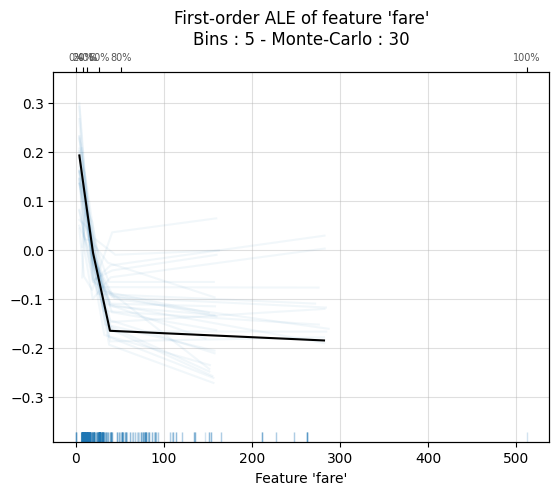

<Axes: title={'center': "First-order ALE of feature 'fare'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'fare'">

In [20]:
# First-order ALE Plot with custom parameters for 'age' and 'fare'
ale_plot(
    model,
    X_train,
    "age",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

ale_plot(
    model,
    X_train,
    "fare",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

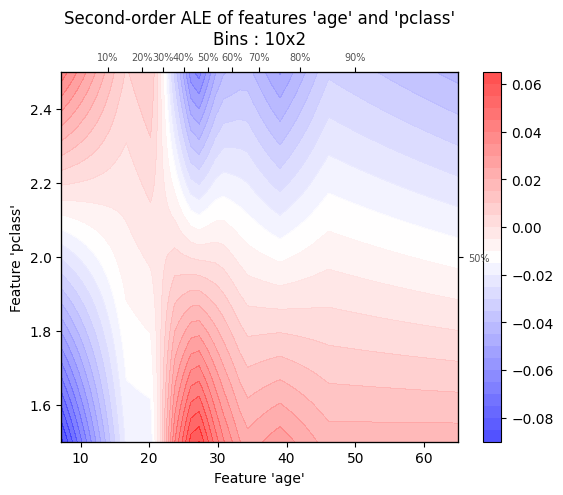

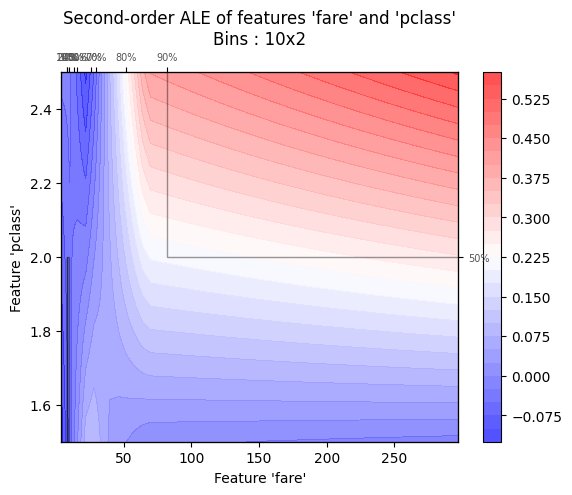

<Axes: title={'center': "Second-order ALE of features 'fare' and 'pclass'\nBins : 10x2"}, xlabel="Feature 'fare'", ylabel="Feature 'pclass'">

In [22]:
# 2D Second-Order ALE Plot for 'age' and 'fare'
ale_plot(model, X_train, ['age', 'pclass'], bins=[10, 4])
ale_plot(model, X_train, ['fare', 'pclass'], bins=[10, 4])